# NLP Basic Assignment
## NLP 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [2]:
# 필요한 모듈 불러오기
import pandas as pd

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [3]:
spam = pd.read_csv('spam.csv')

In [4]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [5]:
spam.head()#v1-> spam or ham, v2-> text

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
spam['v2'].value_counts()
#중복메시지 많이 존재
#자동응답메시지가 많이 존재하는 것으로 보임

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
Okie                                                                                                                                                                    4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                      

In [7]:
spam.drop_duplicates(subset=['v2'],inplace=True)


In [8]:
spam['v2'].value_counts()

Isn't frnd a necesity in life? imagine urself witout a frnd.. hw'd u feel at ur colleg? wat'll u do wth ur cell? wat abt functions? thnk abt events espe'll cared, missed &amp; irritated u? 4wrd it to all those dear-loving frnds wthout whom u cant live.. I jst did it.. Takecare..:) GOODMORNING    1
U reach orchard already? U wan 2 go buy tickets first?                                                                                                                                                                                                                                                   1
Which is weird because I know I had it at one point                                                                                                                                                                                                                                                      1
Just forced myself to eat a slice. I'm really not hungry tho. This sucks. Mark is getting worried. He k

In [ ]:
# unique messages now

## Tokenizing


In [9]:
import nltk

In [15]:
# 예시 코드 코드
from nltk.tokenize import word_tokenize

nltk.download('punkt')
word_tokenize(spam.iloc[5]['v2'])

[nltk_data] Downloading package punkt to C:\Users\Lee Dong
[nltk_data]     woo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['freemsg',
 'hey',
 'there',
 'darling',
 'it',
 's',
 'been',
 'week',
 's',
 'now',
 'and',
 'no',
 'word',
 'back',
 'i',
 'd',
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'to',
 'send',
 'to',
 'rcv']

In [10]:
import re

def clean_text(inputString):
  text_rmv = re.sub('[^a-zA-Z]', ' ', inputString).lower()
  return text_rmv

In [11]:
spam['v2'] = spam['v2'].apply(clean_text)

In [12]:
spam.loc[1,'v2']

'ok lar    joking wif u oni   '

In [13]:
#불용어사전
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_list = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Lee Dong
[nltk_data]     woo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
#word tokenizing
#word tokenizing에는, word_tokenize 말고도 TreebankWordTokenizer, WordPunctTokenizer 등이 존재한다.
from nltk.tokenize import word_tokenize
w_t = spam.copy()

w_t['v2'] = w_t['v2'].map(lambda x: [token for token in word_tokenize(x) if not token in stop_list])

In [22]:
from nltk.tokenize import WordPunctTokenizer
p_t = spam.copy()
p_t['v2'] = p_t['v2'].apply(WordPunctTokenizer().tokenize)


Tokenizer 비교

In [24]:
tok_compare_df = pd.DataFrame([['word_tokenize', w_t.iloc[5]['v2']],['wordPunctTokenizer',p_t.iloc[5]['v2']]])
tok_compare_df

,0,1
0,word_tokenize,"[freemsg, hey, darling, week, word, back, like..."
1,wordPunctTokenizer,"[freemsg, hey, there, darling, it, s, been, we..."


약간은 다르게 tokenizing 하는 것을 볼 수 있다.

## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

Word2Vec: 주변 단어를 통해 단어의 의미를 파악하는 형태. 한 단어를 예측할 때 주변 단어를 참조 , 주변 단어를 예측할 때 중심 단어를 참조

FastText: 주변 단어 + n-gram

GloVe: 주변단어 + 분포가설. 전체 corpus의 통계 정보 고려


통계 기반 기법은, 주변 단어의 빈도를 기초로 단어를 표현한다.
단어의 동시 발생 행렬을 만들고, dense vector을 얻게 되는데, 이 때 corpus의 dimension이 굉장히 커질때가 문제가 되게 된다.
통계 기반 기법은 말뭉치 전체의 통계를 이용해, 한 번에 단어의 분산 표현을 얻고, 추론 기반 기법에서는(말뭉치) mini-batch로 학습하게 된다.

CBOW

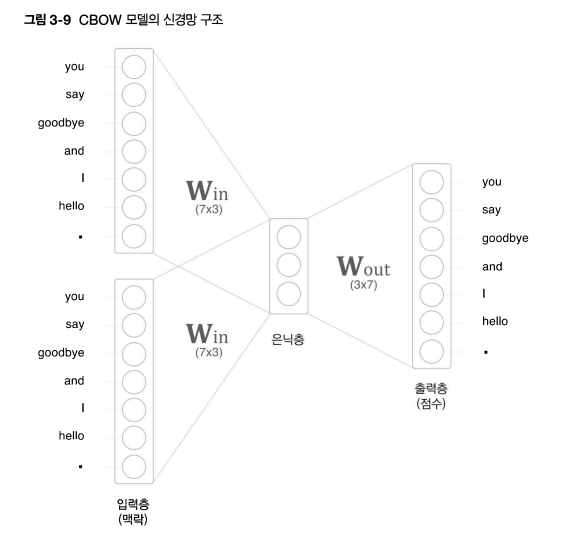

In [25]:
!pip install gensim


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors


Word2Vec훈련시키기

Hyperparameters: 

size = 워드 벡터의 특징값. 즉, 임베딩 된 벡터의 차원.

window = context window 크기

min_count = 단어 최소빈도 수 제한

workers = 학습을 위한 프로세스 수

sg = 0은 CBOW, 1은 skip-gram

In [30]:
#Embedding
#C-BOW, SPAM
model_CBOW_SPAM = Word2Vec(sentences=w_t[w_t['v1']=='spam'].v2, min_count = 5, vector_size =100, window = 2, workers=4,sg=0)
#C-BOW, NON- SPAM
model_CBOW_HAM = Word2Vec(sentences=w_t[w_t['v1']=='ham'].v2, min_count = 5, vector_size =100, window = 2, workers=4,sg=0)
#skip-gram, SPAM
model_SGRAM_SPAM = Word2Vec(sentences=w_t[w_t['v1']=='spam'].v2, min_count = 5, vector_size =100, window = 2, workers=4,sg=1)
#skip-gram, NON- SPAM
model_SGRAM_HAM = Word2Vec(sentences=w_t[w_t['v1']=='ham'].v2, min_count = 5, vector_size =100, window = 2, workers=4,sg=1)

없는 단어들에 대해선, key error raise.

In [31]:
model_SGRAM_HAM.wv.most_similar('crazy')

[('many', 0.9980863332748413),
 ('couple', 0.9979952573776245),
 ('bad', 0.9978780746459961),
 ('since', 0.9978269934654236),
 ('check', 0.997755765914917),
 ('always', 0.9977340698242188),
 ('sat', 0.99772047996521),
 ('anyway', 0.9976813197135925),
 ('guess', 0.9976434707641602),
 ('finish', 0.9976385235786438)]

In [32]:
model_SGRAM_HAM.wv.similarity('crazy','home')

0.99689156

FastText

In [33]:
from gensim.models import FastText


In [34]:
ft_model_ham = FastText(sentences=w_t[w_t['v1']=='ham'].v2,min_count = 5, vector_size =100, window = 5, workers=4)
ft_model_spam = FastText(sentences=w_t[w_t['v1']=='spam'].v2,min_count = 5, vector_size =100, window = 5, workers=4)


In [35]:
ft_model_ham.wv.similarity('crazy','home')

0.99978226

In [36]:
ft_model_ham.wv.most_similar(positive=['speak'])

[('paying', 0.9999609589576721),
 ('walking', 0.9999595284461975),
 ('lover', 0.9999592304229736),
 ('playing', 0.9999592304229736),
 ('bring', 0.9999592304229736),
 ('driving', 0.9999587535858154),
 ('coming', 0.9999585747718811),
 ('picking', 0.9999584555625916),
 ('weather', 0.9999580383300781),
 ('spent', 0.9999578595161438)]

In [37]:
ft_model_ham.wv.similarity('guy','messi')

0.9999099

In [39]:
if 'messi' in w_t[w_t['v1']=='ham'].v2:
    print('messi is present')
else:
    print('messi is not present')

messi is not present


In [ ]:
#'messi'라는 단어가 없음에도, 'guy'와 'messi' 단어의 유사도를 계산해준다.

FastText 모델은 학습하지 않은 단어에 대해서도 벡터를 구할 수 있다는 장점이 있다. 

In [110]:
from collections import Counter
from sklearn.manifold import TSNE
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [145]:
word_list=[]
for i in spams['v2']:
    word_list.extend(i)
word_list

['free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 'st',
 'may',
 'text',
 'fa',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'apply',
 'freemsg',
 'hey',
 'darling',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'rcv',
 'winner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl',
 'valid',
 'hours',
 'mobile',
 'months',
 'u',
 'r',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobiles',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 'six',
 'chances',
 'win',
 'cash',
 'pounds',
 'txt',
 'csh',
 'send',
 'cost',
 'p',
 'day',
 'days',
 'tsandcs',
 'apply',
 'reply',
 'hl',
 'info',
 'urgent',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 'c',
 'www',
 'dbuk',
 'net',
 'lccltd',
 'pobox',
 'ldnw',
 'rw',
 'xxxmobilemovieclub',
 'use',
 'credit'

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

vector_spam = CountVectorizer(stop_words = 'english')
#spam
corpus_spam = sum(w_t[w_t.v1 =='spam']['v2'],[]) # 코퍼스 생성
spam_vector = vector_spam.fit_transform(corpus_spam)

vector_ham = CountVectorizer(stop_words = 'english')
#non-spam
corpus_ham = sum(w_t[w_t.v1 =='ham']['v2'],[])
ham_vector = vector_ham.fit_transform(corpus_ham)


In [50]:
count_spam = pd.DataFrame( {'word' : vector_spam.get_feature_names(), 'count' : spam_vector.sum(axis = 0).flat})
count_spam.sort_values('count', ascending = False).head(20) 
#spam mails inclue the word 'Free' as most frequent, ;mobile', 'nokia'


,word,count
568,free,197
1684,txt,141
1722,ur,119
1513,stop,114
966,mobile,111
1596,text,109
1305,reply,96
267,claim,96
1850,www,83
1208,prize,82


In [51]:
count_ham = pd.DataFrame( {'word' : vector_ham.get_feature_names(), 'count' : ham_vector.sum(axis = 0).flat})
count_ham.sort_values('count', ascending = False).head(20) 
#spam mails inclue the word 'Free' as most frequent, ;mobile', 'nokia'


,word,count
2314,gt,288
3235,lt,287
3819,ok,255
2257,got,239
2968,know,225
3109,like,222
2240,good,215
1051,come,212
5895,ur,198
5651,time,192


일상적인 단어들이 많이 포함되어 있음. 광고와는 확실히 차이가 나는 모습

GloVe

In [106]:
!pip install glove_python_binary

ERROR: Could not find a version that satisfies the requirement glove_python_binary (from versions: none)
ERROR: No matching distribution found for glove_python_binary

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#win10 glove issue

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

In [54]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


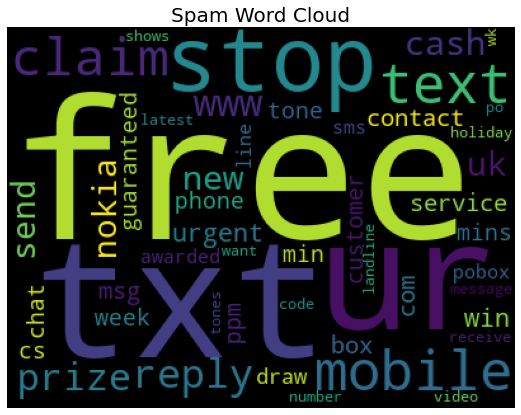

In [55]:
wc = WordCloud(background_color='black', max_words=50, width = 400, height = 300)
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('Spam Word Cloud', size=20)
count_dic = dict(zip(count_spam['word'], count_spam['count']))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)


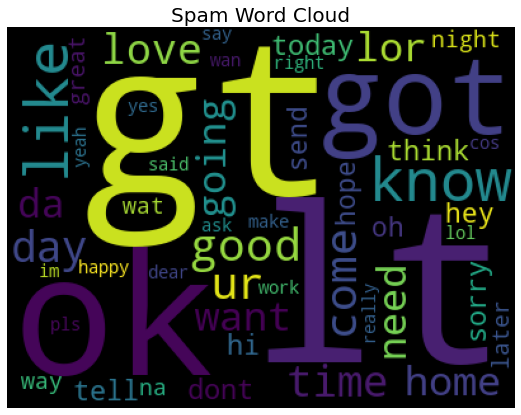

In [56]:
wc = WordCloud(background_color='black', max_words=50, width = 400, height = 300)
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('Spam Word Cloud', size=20)
count_dic = dict(zip(count_ham['word'], count_ham['count']))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)


In [ ]:
#free, phone, mobile 등의 theme 경향성을 찾을 수 있음.